In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from scipy.stats import zscore
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
#from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle
warnings.filterwarnings('ignore')

<h1> Part 1

In [3]:
#Q1.1 a Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable
Churn_1=pd.read_csv('TelcomCustomer-Churn_1.csv')
Churn_1.shape
Churn_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
#Q1.1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable
Churn_2=pd.read_csv('TelcomCustomer-Churn_2.csv')
Churn_2.shape

(7043, 12)

In [5]:
#Q1.1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
Telecom=pd.merge(Churn_1,Churn_2,how='outer', on="customerID")
Telecom.to_csv(r'C:\Users\user\Desktop\AI ML\Ensemble Techniques\et project\New_data.csv')
Telecom.shape

(7043, 21)

In [6]:
Telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
Telecom.sample(20)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4552,1385-TQOZW,Female,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.45,147.55,No
6694,4526-RMTLL,Male,0,Yes,Yes,8,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,Yes,Credit card (automatic),76.15,645.8,No
4111,7184-LRUUR,Female,0,No,No,22,Yes,No,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),65.25,1441.8,No
2674,1855-CFULU,Female,1,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,91.45,No
5818,3197-NNYNB,Male,0,No,No,65,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),105.10,6631.85,No
6363,8778-LMWTJ,Female,0,No,No,9,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.85,708.2,No
6946,9013-AQORL,Female,0,No,Yes,48,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,No
3452,8950-MTZNV,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,44.95,44.95,No
5500,7139-JZFVG,Male,0,Yes,Yes,60,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),60.50,3694.45,No
4423,5951-AOFIH,Male,0,No,No,33,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),66.40,2245.4,No


In [8]:
#Q1.1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python
if set(Telecom.columns) == set(Churn_1.columns) | set(Churn_2.columns):
    print("All the columns are incorporated in the merged DataFrame")
else:
    print("Some difference in one of the DataFrames")
    

All the columns are incorporated in the merged DataFrame


In [9]:
#Q1.2 a Impute missing/unexpected values in the DataFrame
Telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#Q1.2 b Make sure all the variables with continuous values are of ‘Float’ type
Telecom["TotalCharges"]=pd.to_numeric(Telecom["TotalCharges"],errors='coerce')
new_telecom=Telecom.astype({"SeniorCitizen":"float",
                            "tenure":"float",
                            "MonthlyCharges":"float",
                            "TotalCharges":"float"})


In [11]:
new_telecom["TotalCharges"].fillna((new_telecom["TotalCharges"].mean()), inplace=True)
new_telecom["TotalCharges"].isnull().sum()

0

In [12]:
new_telecom.dtypes


customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
#Q1.2 c Create a function that will accept a DataFrame as input and return pie-charts for all theappropriate Categorical features. Clearly show percentage distribution in the piechart.
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVar(tele_pie,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
   
    a = []
    for i in tele_pie:
        a.append(i)
    
    
    b = []
    for i in a:
        if (tele[i].dtype.name) == 'object':
            b.append(i)
        
    plt.figure(figsize=(15, 18))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=20, y=.95)
    
    
    ncols = m
   
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    
    for n, i in enumerate(b):
       
        ax = plt.subplot(nrows, ncols, n + 1)

        
        tele.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()



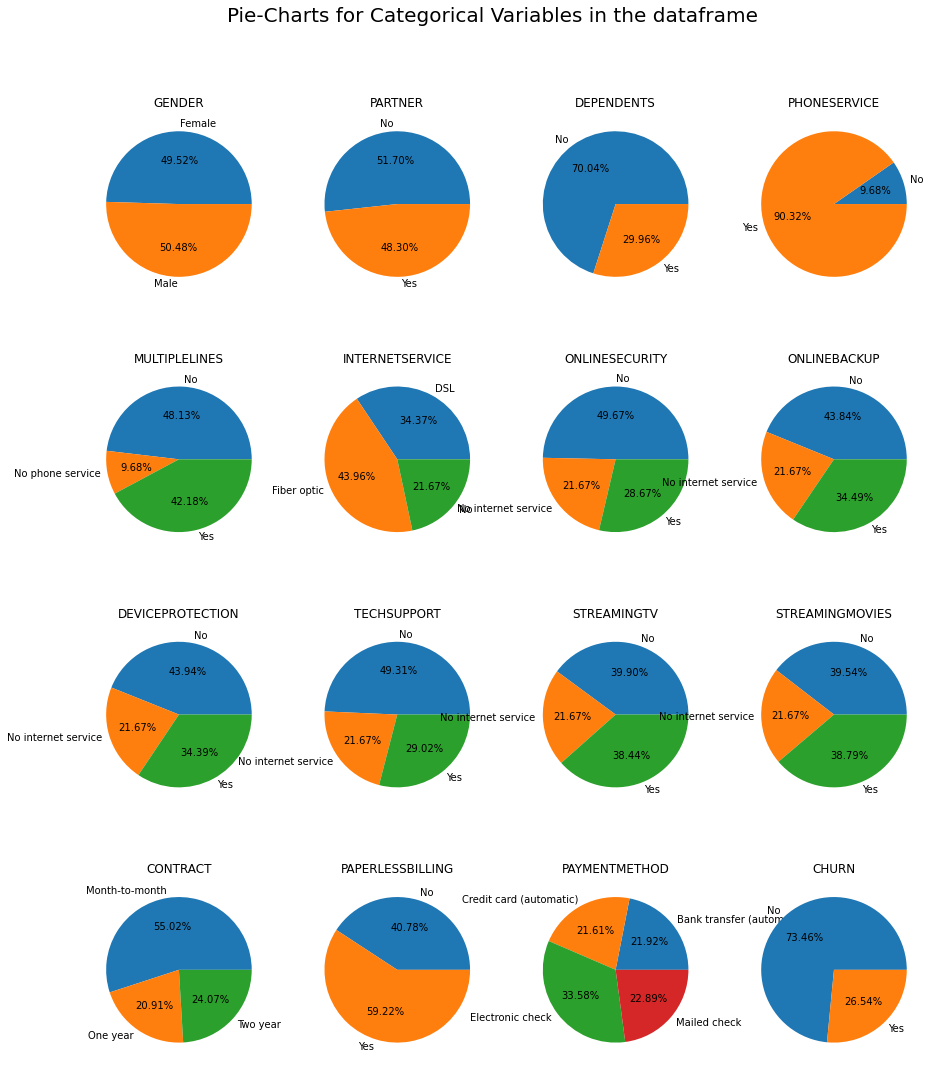

In [14]:
tele=new_telecom.drop(columns='customerID')

pie_charts_for_CategoricalVar(tele,4)

<b>Q1.2 d.Share insights for Q2.c
<br>Dependents are less i.e 70.04%
<br>We can see most of the customer does have Phone Service i.e 90.32%
<br>Payment Method has a bit more contribution in Electronic Check then other methods i.e 33.58%
<br>Many customer prefer paperless billing over paper billing i.e 59.22%
<br>Customer perfer month to month contract compared with other i.e55.02%
<br>Around 43.94% customers do not have device protection .
<br>Customer prefer fiber optic internet service over other i.e 43.96%

In [15]:
#Q1.2 e.Encode all the appropriate Categorical features with the best suitable approach
#.replace ani dummies
tele.Churn.replace(('Yes','No'),(1,0),inplace=True)
tele_encoded=pd.get_dummies(data=tele,drop_first=True)


In [16]:
#Q1.2 f.Split the data into 80% train and 20% test.
X = tele_encoded.drop('Churn',axis=1)
y = tele_encoded['Churn']
x_train, x_test,y_train,y_test = train_test_split(X,y,random_state=67,test_size=.20)

In [17]:
#Q1.2 g.Normalize/Standardize the data with the best suitable approach 
sc = StandardScaler()
# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(x_train),index=x_train.index, columns=x_train.columns)
# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(x_test),index=x_test.index, columns=x_test.columns)
# Summary statistics after standardization
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.0,8.137891e-16,1.000089,-0.440337,-0.440337,-0.440337,-0.440337,2.270986
tenure,5634.0,-7.192606e-17,1.000089,-1.326300,-0.959463,-0.144272,0.956237,1.608390
MonthlyCharges,5634.0,-4.059388e-17,1.000089,-1.544568,-0.965917,0.181410,0.834887,1.792655
TotalCharges,5634.0,3.760846e-17,1.000089,-1.002848,-0.829221,-0.389526,0.674390,2.813512
gender_Male,5634.0,6.622124e-16,1.000089,-1.008556,-1.008556,0.991516,0.991516,0.991516
Partner_Yes,5634.0,-5.036795e-17,1.000089,-0.951139,-0.951139,-0.951139,1.051371,1.051371
Dependents_Yes,5634.0,-3.254605e-16,1.000089,-0.654322,-0.654322,-0.654322,1.528300,1.528300
PhoneService_Yes,5634.0,6.003165e-16,1.000089,-3.074523,0.325254,0.325254,0.325254,0.325254
MultipleLines_No phone service,5634.0,-9.134018e-16,1.000089,-0.325254,-0.325254,-0.325254,-0.325254,3.074523
MultipleLines_Yes,5634.0,3.294016e-16,1.000089,-0.850566,-0.850566,-0.850566,1.175687,1.175687


In [18]:
#Q1.3 a. Train a model using XGBoost. Also print best performing parameters along with train and test performance
# Initiate XGBoost Classifier
xgboost = XGBClassifier()
# Print default setting
xgboost.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [19]:
# Train the model
#parag 
xgboost = XGBClassifier(seed=0).fit(X_train_transformed,y_train)
# Make prediction
xgboost_predict = xgboost.predict(X_test_transformed)
# Get predicted probability
xgboost_predict_prob = xgboost.predict_proba(x_test)[:,1]

In [20]:
# Get performance metrics
precision, recall, fscore, support = score(y_test, xgboost_predict)
# Print result
print(f'The recall value for the baseline xgboost model is {recall[1]:.4f}')
print(f'Accuracy Score of the model :{accuracy_score(y_test, xgboost_predict):4f}')
print("\n\t\t\tClassification Report ")
print(classification_report(y_test, xgboost_predict))

The recall value for the baseline xgboost model is 0.5368
Accuracy Score of the model :0.791341

			Classification Report 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1029
           1       0.63      0.54      0.58       380

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [21]:
# Define the search space
param_grid = { 
    
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    
    "max_depth": range(3,21,3),
   
    "gamma": [i/10.0 for i in range(0,5)],
   
    "colsample_bytree": [i/10.0 for i in range(3,10)],
   
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}

scoring = ['recall']

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [22]:
# Define random search
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0,random_state=0)
# Fit random search
random_result = random_search.fit(X_train_transformed, y_train)
# Print random search summary
random_result

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_ty...
                                           predictor='auto', random_state=0, ...),
                   n_iter=48, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                   

In [23]:
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_result.best_score_:.4f}')
print('The best score standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
print(f'The best hyperparameters are {random_result.best_params_}')

The best score is 0.5258
The best score standard deviation is 0.0275
The best hyperparameters are {'reg_lambda': 0.01, 'reg_alpha': 0.01, 'max_depth': 6, 'learning_rate': 0.0001, 'gamma': 0.1, 'colsample_bytree': 0.9}


In [24]:
# Make prediction using the best model
random_predict = random_search.predict(X_test_transformed)
# Get predicted probabilities
random_predict_prob = random_search.predict_proba(X_test_transformed)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, random_predict)
# Print result
print(f'The recall value for the xgboost random search is {recall[1]:.4f}')
print(classification_report(y_test,random_predict))

The recall value for the xgboost random search is 0.5553
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1029
           1       0.62      0.56      0.59       380

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409



<b>We have seen that the recall score for XGBclassifier is 53.16% . By using RandomizedSearchCV we are able see an increase in  it to 55.53%
    

In [25]:
#Q1.3 b Improve performance of the XGBoost as much as possible. 
#Also print best performing parameters along with train and test performance.
# Define the search space
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [26]:
# Define grid search
grid_search = GridSearchCV(estimator=xgboost, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train_transformed, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=Non...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=

In [27]:
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.5178
The best score standard deviation is 0.0171
The best hyperparameters are {'colsample_bytree': 0.3, 'reg_alpha': 5, 'reg_lambda': 0.5}


In [28]:
# Make prediction using the best model
grid_predict = grid_search.predict(X_test_transformed)
# Get predicted probabilities
grid_predict_prob = grid_search.predict_proba(X_test_transformed)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, grid_predict)
# Print result
print(f'The recall value for the xgboost grid search is {recall[1]:.4f}')
print(classification_report(y_test,grid_predict))

The recall value for the xgboost grid search is 0.5316
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1029
           1       0.63      0.53      0.58       380

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [29]:

D_train = xgb.DMatrix(x_train, label=y_train)
D_test = xgb.DMatrix(x_test, label=y_test)
param = {
    'eta':0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations
model = xgb.train(param, D_train, steps)


preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7669694425888376
Recall = 0.7309843486266687
Accuracy = 0.8119233498935415


<h1> Part 2

In [30]:
# Function to preprocess the data
def preprocess_data(path_to_csv):
    df = pd.read_csv(path_to_csv)
    
    #print("The first 5 data points :\n ",df.head(),"\n")
    #print("The dataframe rows and column count :\n ",df.shape,"\n")
    #print("Df data types  :\n ",df.info(),"\n")
    #print("Df  5  point summary of data :\n ",df.describe(),"\n")
   # print("Count of null values:\n ",df.isnull().sum(),"\n")
    # Impute missing values (you can use loops and conditions imputing missing values)
    for i in df:
        if df[i].isnull().sum()!=0:
            print("The null value is present in ",i)
            for j in i:
                df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean
        else:
            pass
    #print("The column wise count of null values ",df.isnull().sum())
    if df.duplicated().sum()!=0:
        print(df.lococ[df.duplicated(keep="First"),:])
        df.drop_duplicates(inplace=True)
    else :
        print("No duplicates")
    
    df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')
    new_df=df.astype({"SeniorCitizen":"float",
                            "tenure":"float",
                            "MonthlyCharges":"float",
                            "TotalCharges":"float"})
    new_df["TotalCharges"].fillna((new_df["TotalCharges"].mean()), inplace=True)
    new_df["TotalCharges"].isnull().sum()
    new_df.Churn.replace(('Yes','No'),(1,0),inplace=True)
    pre_data=pd.get_dummies(data=new_df,drop_first=True)
    
    return pre_data

In [31]:
def split_data(pre_data):
    X_b = pre_data.drop('Churn',axis=1)
    y_b= pre_data['Churn']
    x_train_b, x_test_b,y_train_b,y_test_b = train_test_split(X_b,y_b,random_state=67,test_size=.3)
    sc = StandardScaler()
    # Standardize the training dataset
    X_train_transformed_b = pd.DataFrame(sc.fit_transform(x_train_b),index=x_train_b.index, columns=x_train_b.columns)
    # Standardized the testing dataset
    X_test_transformed_b = pd.DataFrame(sc.transform(x_test_b),index=x_test_b.index, columns=x_test_b.columns)
    return X_train_transformed_b,X_test_transformed_b,y_train_b,y_test_b

In [32]:
def model_building(X_train_transformed_b,X_test_transformed_b,y_train_b,y_test_b):
   
     #using xgboost
    print("XGBoost")
    xgboost = XGBClassifier()
    # Train the model
    #parag 
    xgboost = XGBClassifier(seed=0).fit(X_train_transformed,y_train)
    # Make prediction
    xgboost_predict_b = xgboost.predict(X_test_transformed)
    # Get predicted probability
    #xgboost_predict_prob = xgboost.predict_proba(x_test)[:,1]
    # Get performance metrics
    acc_xgb = accuracy_score(y_test, xgboost_predict_b)
    print("XGBoost Accuracy",acc_xgb)
    
    
    # using Gaussian algorithm from Naive Bayes
    print("Naive Bayes")
    GNB = GaussianNB()

    GNB.fit(X_train_transformed_b, y_train_b.ravel())
    GNB_predict = GNB.predict(X_train_transformed_b)
    GNB_predict = GNB.predict(X_test_transformed_b)
    acc_nb=metrics.accuracy_score(y_test_b, GNB_predict)
    print("The accuracy of model by Navies Bayes is : ",acc_nb)
    
    """"cm=metrics.confusion_matrix(y_test, GNB_predict)
    df_cm = pd.DataFrame(cm)
    print("Confusion Matrix by Naive Bayes")
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()"""
    
    
    print("\n")
    # Logistic Regression model
    print("Logistic Regression")
    model = LogisticRegression(solver="liblinear")
    model.fit(X_train_transformed_b, y_train_b)
    #predict on test
    y_predict = model.predict(X_test_transformed_b)
    coef_df = pd.DataFrame(model.coef_)
    coef_df['intercept'] = model.intercept_
    print(coef_df)
    acc_lr=model.score(X_test_transformed_b, y_test_b)
    print("The accuracy of model by Logistic Regression is : ",acc_lr)
    
    """"cm=metrics.confusion_matrix(y_test, y_predict)
    df_cm = pd.DataFrame(cm)
    print("Confusion Matrix by Logistic Regression")
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()"""
    
    
    print("\n")
    
    
    print("\n")
    # using Decission Tree
    print("Decision Tree")
    dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
    dTree.fit(X_train_transformed_b, y_train_b)
    acc_dt=dTree.score(X_test_transformed_b , y_test_b)
    print("The accuracy of model by Decision Tree is : ",acc_dt )
    y_predict = dTree.predict(X_test_transformed_b)
    
    """"cm=metrics.confusion_matrix(y_test, y_predict)
    df_cm = pd.DataFrame(cm)
    print("Confusion Matrix by Decision Tree")
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()"""

    print("\n")
    # using Bagging Classifier
    print("Bagging Classifier")
    bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
    bgcl = bgcl.fit(X_train_transformed_b, y_train_b)
    pred_BG =bgcl.predict(X_test_transformed_b)
    acc_BG = accuracy_score(y_test_b, pred_BG)
    print("The accuracy of model by Bagging Classifier is : ",acc_BG)
    
    """"cm=metrics.confusion_matrix(y_test, pred_BG)
    df_cm = pd.DataFrame(cm)
    print("Confusion Matrix by Bagging Classifier")
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()"""
    
    
    print("\n")
    # using RandomForestClassifier
    print("RandomForestClassifier")
    rfcl = RandomForestClassifier(n_estimators = 50)
    rfcl = rfcl.fit(X_train_transformed_b, y_train_b)
    pred_RF = rfcl.predict(X_test_transformed_b)
    acc_RF = accuracy_score(y_test_b, pred_RF)
    print("The accuracy of model by RandomForestClassifier is : ",acc_RF)
    
    """"cm=metrics.confusion_matrix(y_test, pred_RF)
    df_cm = pd.DataFrame(cm)
    print("Confusion Matrix by RandomForestClassifier")
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()"""
    
    print("\n")
    # using AdaBoostClassifier
    print("AdaBoostClassifier")
    abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
    abcl = abcl.fit(X_train_transformed_b, y_train_b)
    pred_AB =abcl.predict(X_test_transformed_b)
    acc_AB = accuracy_score(y_test_b, pred_AB)
    print("The accuracy of model by AdaBoostClassifier is : ",acc_AB)
    
    """"cm=metrics.confusion_matrix(y_test, pred_AB)
    df_cm = pd.DataFrame(cm)
    print("Confusion Matrix by AdaBoostClassifier")
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()"""
    
    
    print("\n")
    # using GradientBoostingClassifier
    print("GradientBoostingClassifier")
    gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
    gbcl = gbcl.fit(X_train_transformed_b, y_train_b)
    pred_GB =gbcl.predict(X_test_transformed_b)
    acc_GB = accuracy_score(y_test_b, pred_GB)
    print("The accuracy of model by GradientBoostingClassifier is : ",acc_GB)
    
    """"cm=metrics.confusion_matrix(y_test, pred_GB)
    df_cm = pd.DataFrame(cm)
    print("Confusion Matrix by GradientBoostingClassifier")
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)"""
    
   
    # Building KNN Model
    print("KNN Model")
    NNH = KNeighborsClassifier(n_neighbors = 5, weights = "distance")
    NNH.fit(X_train_transformed_b,y_train_b)
    NNH_Predicts = NNH.predict(X_test_transformed_b)
    acc_NNH=NNH.score(X_test_transformed_b,y_test_b)
    print("The accuracy of model by KNN Classifier is : ",acc_NNH)
    
    """"cm=metrics.confusion_matrix(y_test, NNH_Predicts)
    df_cm = pd.DataFrame(cm)
    print("Confusion Matrix by KNN")
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()"""
    
   
    
    
    resultDf = pd.DataFrame({'Method':["KNN Classifier","Logistic Regression","Navies Bayes","Decision Tree","Bagging Classifier","RandomForestClassifier","AdaBoostClassifier","GradientBoostingClassifier","XGBoost"],'accuracy': [acc_NNH, acc_lr, acc_nb, acc_dt, acc_BG, acc_RF, acc_AB, acc_GB,acc_xgb]})
                                     
    resultDf = resultDf[['Method', 'accuracy']]
    print(resultDf)
    return resultDf


In [33]:
def compare_acc(Dataframe):
    max_acc = Dataframe["accuracy"].max()
    best_model=Dataframe[["Method","accuracy"]].sort_values(by="accuracy", ascending = False).head(1)
    return best_model

In [34]:
#function to save pickle file
def model_save(model,best_file_name):
    pickle.dump(model,open(best_file_name,'wb'))

In [35]:
def main():
    #pre_processing 
    pre_data=preprocess_data('New_data.csv')
    #to_splitdata
    X_train_transformed_b,X_test_transformed_b,y_train_b,y_test_b=split_data(pre_data)
    #model bulding 
    result=model_building(X_train_transformed_b,X_test_transformed_b,y_train_b,y_test_b)
    #compare and return best model
    final_model=compare_acc(result)
    #function to save and load pickle file
   
    model_save(final_model,"model.pkl")
    
    print("\t\t\tBest Performing Model")
    print(final_model)
if __name__ == "__main__":
    main()

No duplicates
XGBoost
XGBoost Accuracy 0.7913413768630234
Naive Bayes
The accuracy of model by Navies Bayes is :  0.26786559394226217


Logistic Regression
          0         1         2         3         4    5        6         7  \
0  0.016493  0.265559 -0.639633  0.213962 -0.450969  0.0  0.09251  0.090696   

     8         9  ...      7064      7065      7066      7067      7068  \
0  0.0 -0.063627  ...  0.067867 -0.153337  0.134459 -0.409288 -0.399218   

       7069      7070      7071      7072  intercept  
0  0.245279 -0.107337  0.411236 -0.087462  -3.135762  

[1 rows x 7074 columns]
The accuracy of model by Logistic Regression is :  0.7969711310932324




Decision Tree
The accuracy of model by Decision Tree is :  0.7946048272598202


Bagging Classifier
The accuracy of model by Bagging Classifier is :  0.7941315664931378


RandomForestClassifier
The accuracy of model by RandomForestClassifier is :  0.7908187411263606


AdaBoostClassifier
The accuracy of model by AdaBoostClass